In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Nrnd = 10000
x = -1+2*np.random.random(size=Nrnd)
y = -1+2*np.random.random(size=Nrnd)

We distribute 10,000 random particles in a square of side=2

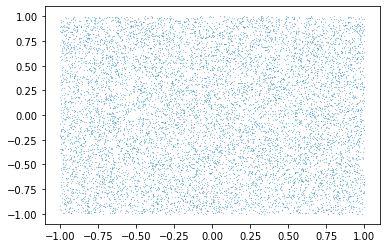

In [3]:
plt.scatter(x,y, s=0.1, marker='.')

In an area $dA$ the average number of particles will be $N(dA)=\rho dA$, with $\rho = N_{tot}/A_{tot} = 10,000/4$

So in any point in this square, sufficiently away from the edge, we can select a circle of radius $r$ and the number of particles inside of that circle will be: $N(r) = \rho \pi r^{2}$ (since $\pi r^{2}$ is the area of the circle).

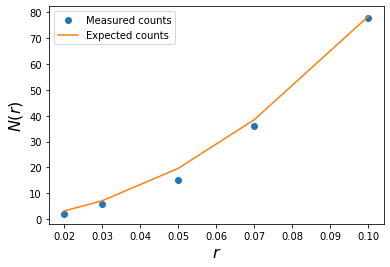

In [4]:
# Let's count in different circles centered at 0,0
r = np.array([0.02, 0.03, 0.05, 0.07, 0.1])
n_r = []
#define our variables
side=2
Atot = side**2
rho = Nrnd/Atot
#now plot!
for i in range(len(r)):
    n_r.append(np.count_nonzero((x**2+y**2) < r[i]**2)) # x**2+y**2 is the distance to the center!
    #print(n_r[i])
plt.plot(r, n_r, 'o', label='Measured counts')
plt.plot(r, rho*np.pi*r**2, label='Expected counts')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N(r)$', fontsize=16)
plt.legend(loc='best')

So, if for every particle we measure the distance with its neighbors, and then count the number of pairs within a certain distance we get that $N_{pairs}(r) = \rho \pi r^{2}$, and the number of neighbors between $r$ and $r+dr$ will be: $N_{pairs} (r, r+dr) = \rho \pi ((r+dr)^{2}-r^{2})$ (area of the big circle with radius $r+dr$ minus the area of the small circle of radius $r$). The total number of pairs will be $N_{pairs, tot} (r, r+dr) = N_{tot}\rho \pi ((r+dr)^{2}-r^{2})$.

In [5]:
# So now, let's compute the distance between each particle and the rest (note that we are avoiding double counting)
distances = []
for i in range(x.size):
    distances.append(np.sqrt((x[i+1:]-x[i])**2+(y[i+1:]-y[i])**2)) # Distances is going to be a list of lists

In [6]:
distances = np.concatenate(distances) # We convert to a single list

Text(0, 0.5, '$N_{pairs}$')

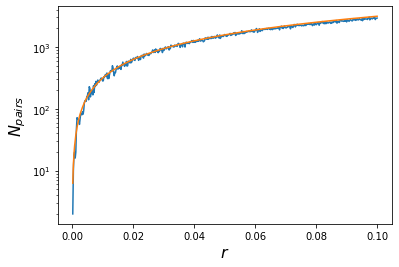

In [7]:
hist, be = np.histogram(distances, range=(0,0.1), bins=500)
sep_dist = 0.5*(be[1:]+be[:-1])
dsep = sep_dist[1]-sep_dist[0]
N_dist = Nrnd*rho*np.pi*(2*sep_dist*dsep+dsep**2)
plt.plot(sep_dist, hist*2.0, label='Counted randoms') # We multiply times 2 because in the formula we are double-counting but in our computations we weren't to speed-up the process
plt.plot(sep_dist, N_dist, label='Expected number of pairs')
plt.yscale('log')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N_{pairs}$', fontsize=16)

So we got a pretty good match! You can check that at larger distances this expression starts to fail, since we start to miss pairs due to the fact that we have a finite area:

Text(0, 0.5, '$N_{pairs}$')

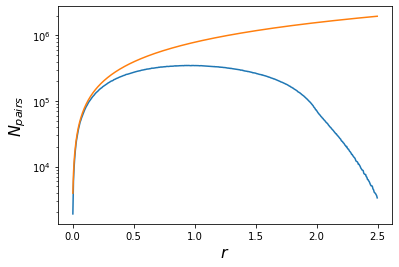

In [8]:
hist, be = np.histogram(distances, range=(0,2.5), bins=500)
sep_dist = 0.5*(be[1:]+be[:-1])
dsep = sep_dist[1]-sep_dist[0]
N_dist = 10000*10000/4*np.pi*(2*sep_dist*dsep+dsep**2)
plt.plot(sep_dist, hist*2.0, label='Counted randoms') # We multiply times 2 because in the formula we are double-counting but in our computations we weren't to speed-up the process
plt.plot(sep_dist, N_dist, label='Expected number of pairs')
plt.yscale('log')
plt.xlabel('$r$', fontsize=16)
plt.ylabel('$N_{pairs}$', fontsize=16)

If, instead we were in a 3D space, the number of particles in a sphere would grow as $r^{3}$, and if we were in another type of geometry we would have that the number of particles grows as $r^{D}$, where $D$ is the dimensionality of our geometry (if $D$ is not integer we say that we are in a fractal geometry).

It seems that counting particles in a volume can give us information about properties in the "Universe" so, what happens with galaxies? Are they randomly placed?